<a href="https://colab.research.google.com/github/Andyqballer/DEEP-LEARNING-YOLOV5-BACK-BONE-WITH-CNN-MODEL-DETECTION./blob/main/DEEP_LEARNING_Yolov5_WITH_CNN_MODEL_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


Download datatset and extrac file or upload it manually

Mapping dateset to train, valid, test etc folders for traing data modeling

In [1]:
import os
import shutil

# Function to create directory if it doesn't exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Path to the dataset directory
dataset_path = "/content/dataset/"

# Path to the images and labels directories within the dataset
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

# Verify if the images and labels directories exist
if not os.path.exists(images_path) or not os.path.exists(labels_path):
    print("Images or labels directory not found.")
    exit()

# Get all image files
all_images = [filename for filename in os.listdir(images_path) if filename.endswith(".jpg")]

# Calculate counts for train, validation, and test sets
total_images = len(all_images)
train_count = int(0.6 * total_images)
val_count = int(0.2 * total_images)
test_count = total_images - train_count - val_count

print("Total images:", total_images)
print("Train count:", train_count)
print("Validation count:", val_count)
print("Test count:", test_count)

# Divide images into train, validation, and test sets
train_images = all_images[:train_count]
val_images = all_images[train_count:train_count + val_count]
test_images = all_images[train_count + val_count:]

# Create destination directories for train, validation, and test sets
train_images_dest = "/content/train/images/"
val_images_dest = "/content/valid/images/"
test_images_dest = "/content/test/images/"
create_directory(train_images_dest)
create_directory(val_images_dest)
create_directory(test_images_dest)

# Function to move images and labels
def move_images_and_labels(images, source_dir, dest_dir):
    for image in images:
        label = image.replace(".jpg", ".txt")
        image_path = os.path.join(source_dir, image)
        label_path = os.path.join(labels_path, label)
        if os.path.exists(label_path):
            shutil.move(image_path, os.path.join(dest_dir, image))
            shutil.move(label_path, os.path.join(dest_dir.replace("images", "labels"), label))

# Move images and labels to respective directories
move_images_and_labels(train_images, images_path, train_images_dest)
move_images_and_labels(val_images, images_path, val_images_dest)
move_images_and_labels(test_images, images_path, test_images_dest)

# Print directory structure
print("\nDirectory structure after moving files:")
!ls -R /content


Total images: 340
Train count: 204
Validation count: 68
Test count: 68

Directory structure after moving files:
/content:
dataset  data.yaml  sample_data  test  train  valid  yolov5

/content/dataset:
images	labels

/content/dataset/images:
'1478019953180167674_jpg.rf.8a816c9d7e9b423a63ed6ecd4a663e47 - Copy.jpg'
'1478019953180167674_jpg.rf.azslsZnM8FLQPu3QWLTl - Copy.jpg'
'1478019953689774621_jpg.rf.2e4b7ae29c3379da1282e85cff4c1745 - Copy.jpg'
'1478019953689774621_jpg.rf.UpOkvtBppZZaLfvVZ0JX - Copy.jpg'
'1478019954186238236_jpg.rf.cbpP963e2sN7rHIZMJtD - Copy.jpg'
'1478019954186238236_jpg.rf.f8ac6ad31e400d4918ff394f903bb95c - Copy.jpg'
'1478019954685370994_jpg.rf.049fda8ca86adf1e404b41955eb4aba8 - Copy.jpg'

/content/dataset/labels:
1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee.txt
1478019952686311006_jpg.rf.JLSB3LP2Q4RuGHYKqfF6.txt
1478020248195735152_jpg.rf.f6a77e79fd47ca791d6148d141fef5ee.txt
1478020248195735152_jpg.rf.IklP8IoVcg4jiUcYtCrm.txt
1478020248696734038_jpg.rf

In [6]:
#extracting information from the roboflow file
!pwd
%cd content/
print('current dirctory is printed above')
%cat data.yaml

/
/content
current dirctory is printed above
train: ../train/images
val: ../valid/images


nc: 11
names: ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

In [7]:
# define number of classes based on data.yaml
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

displaying default yolov5 model network

In [8]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [9]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

customize yolov5 network  backbone with CNN model

In [16]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: 5  # number of classes

# YOLOv5 backbone with custom CNN model
backbone:
  # Pre-trained CNN model (e.g., ResNet-50)
  [[-1, 1, Conv, [64, 7, 2]],
   [-1, 1, MaxPool, [3, 2]],
   [-1, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [192, 3, 1]],
   [-1, 1, MaxPool, [3, 2]],
   [-1, 1, ResBlock, [256]],  # Example: Custom ResBlock layer
   [-1, 1, ResBlock, [512]],  # Example: Custom ResBlock layer
   [-1, 1, Conv, [1024, 3, 1]],
   [-1, 1, Conv, [1024, 3, 1]],
   [-1, 1, GlobalAvgPool, ['']],
   [-1, 1, nn.Linear, [nc, '']]  # final linear layer for classification
  ]

# YOLOv5 detection head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]


In [11]:
# train yolov5s on custom data for 20 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 3 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
2024-05-01 00:33:20.041406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 00:33:20.041507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 00:33:20.207856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_

In [12]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7273488 parameters, 0 gradients
image 1/67 /content/test/images/1478019956186247611_jpg.rf.9ad113e7eb74453890500935ec00590a.jpg: 416x416 (no detections), 369.8ms
image 2/67 /content/test/images/1478019957687018435_jpg.rf.f4d1d5ec89c63e083d0930dd819271d4.jpg: 416x416 (no detections), 350.6ms
image 3/67 /content/test/images/1478019960189614397_jpg.rf.579057110e268d1b10eb39053a31c988

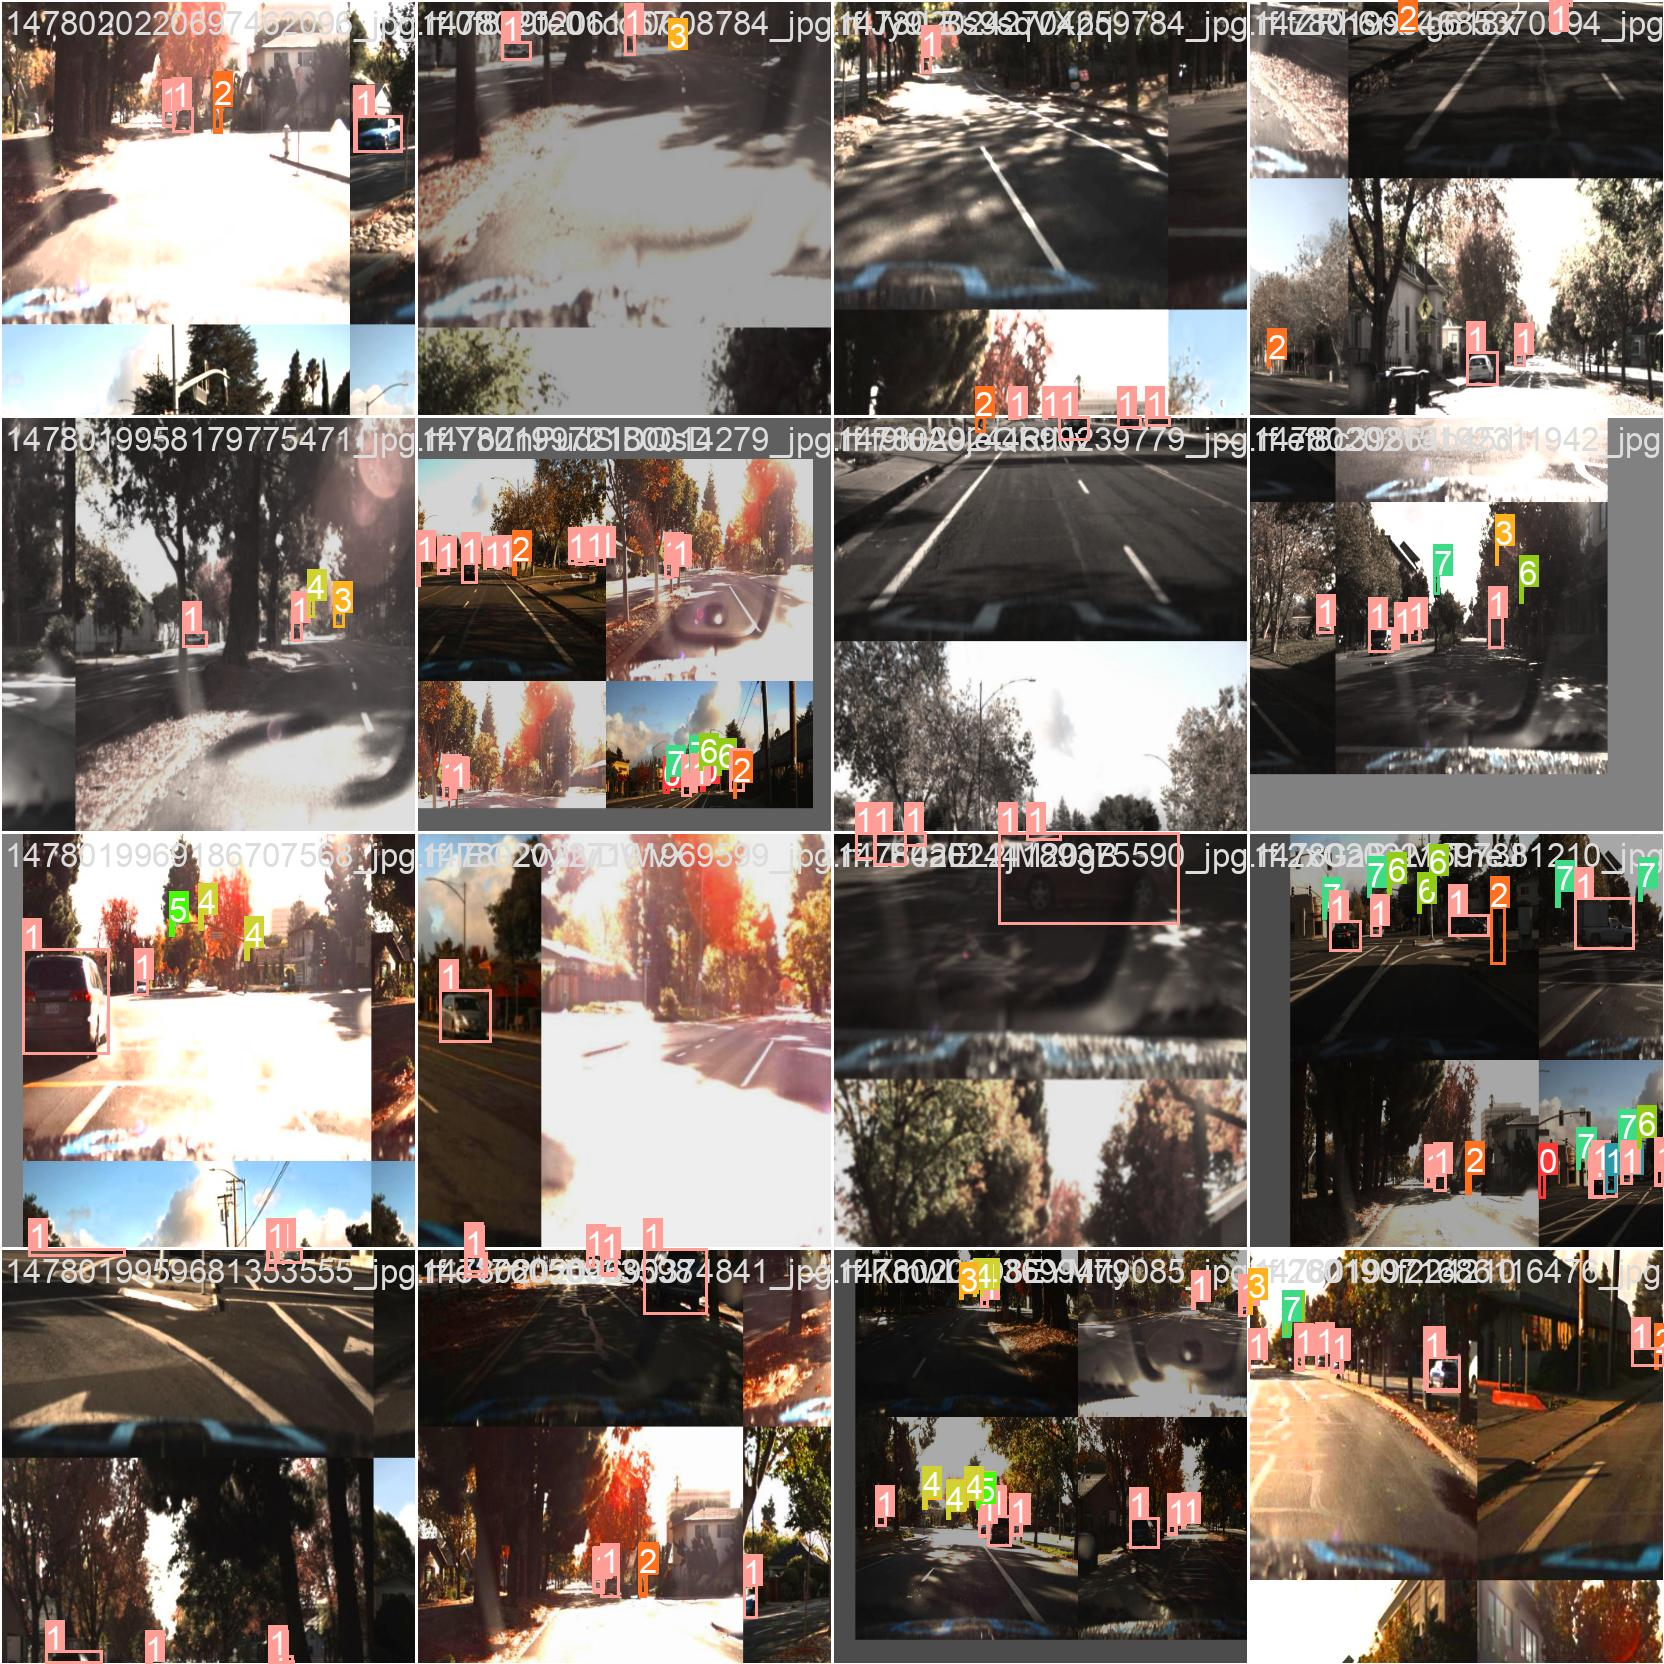

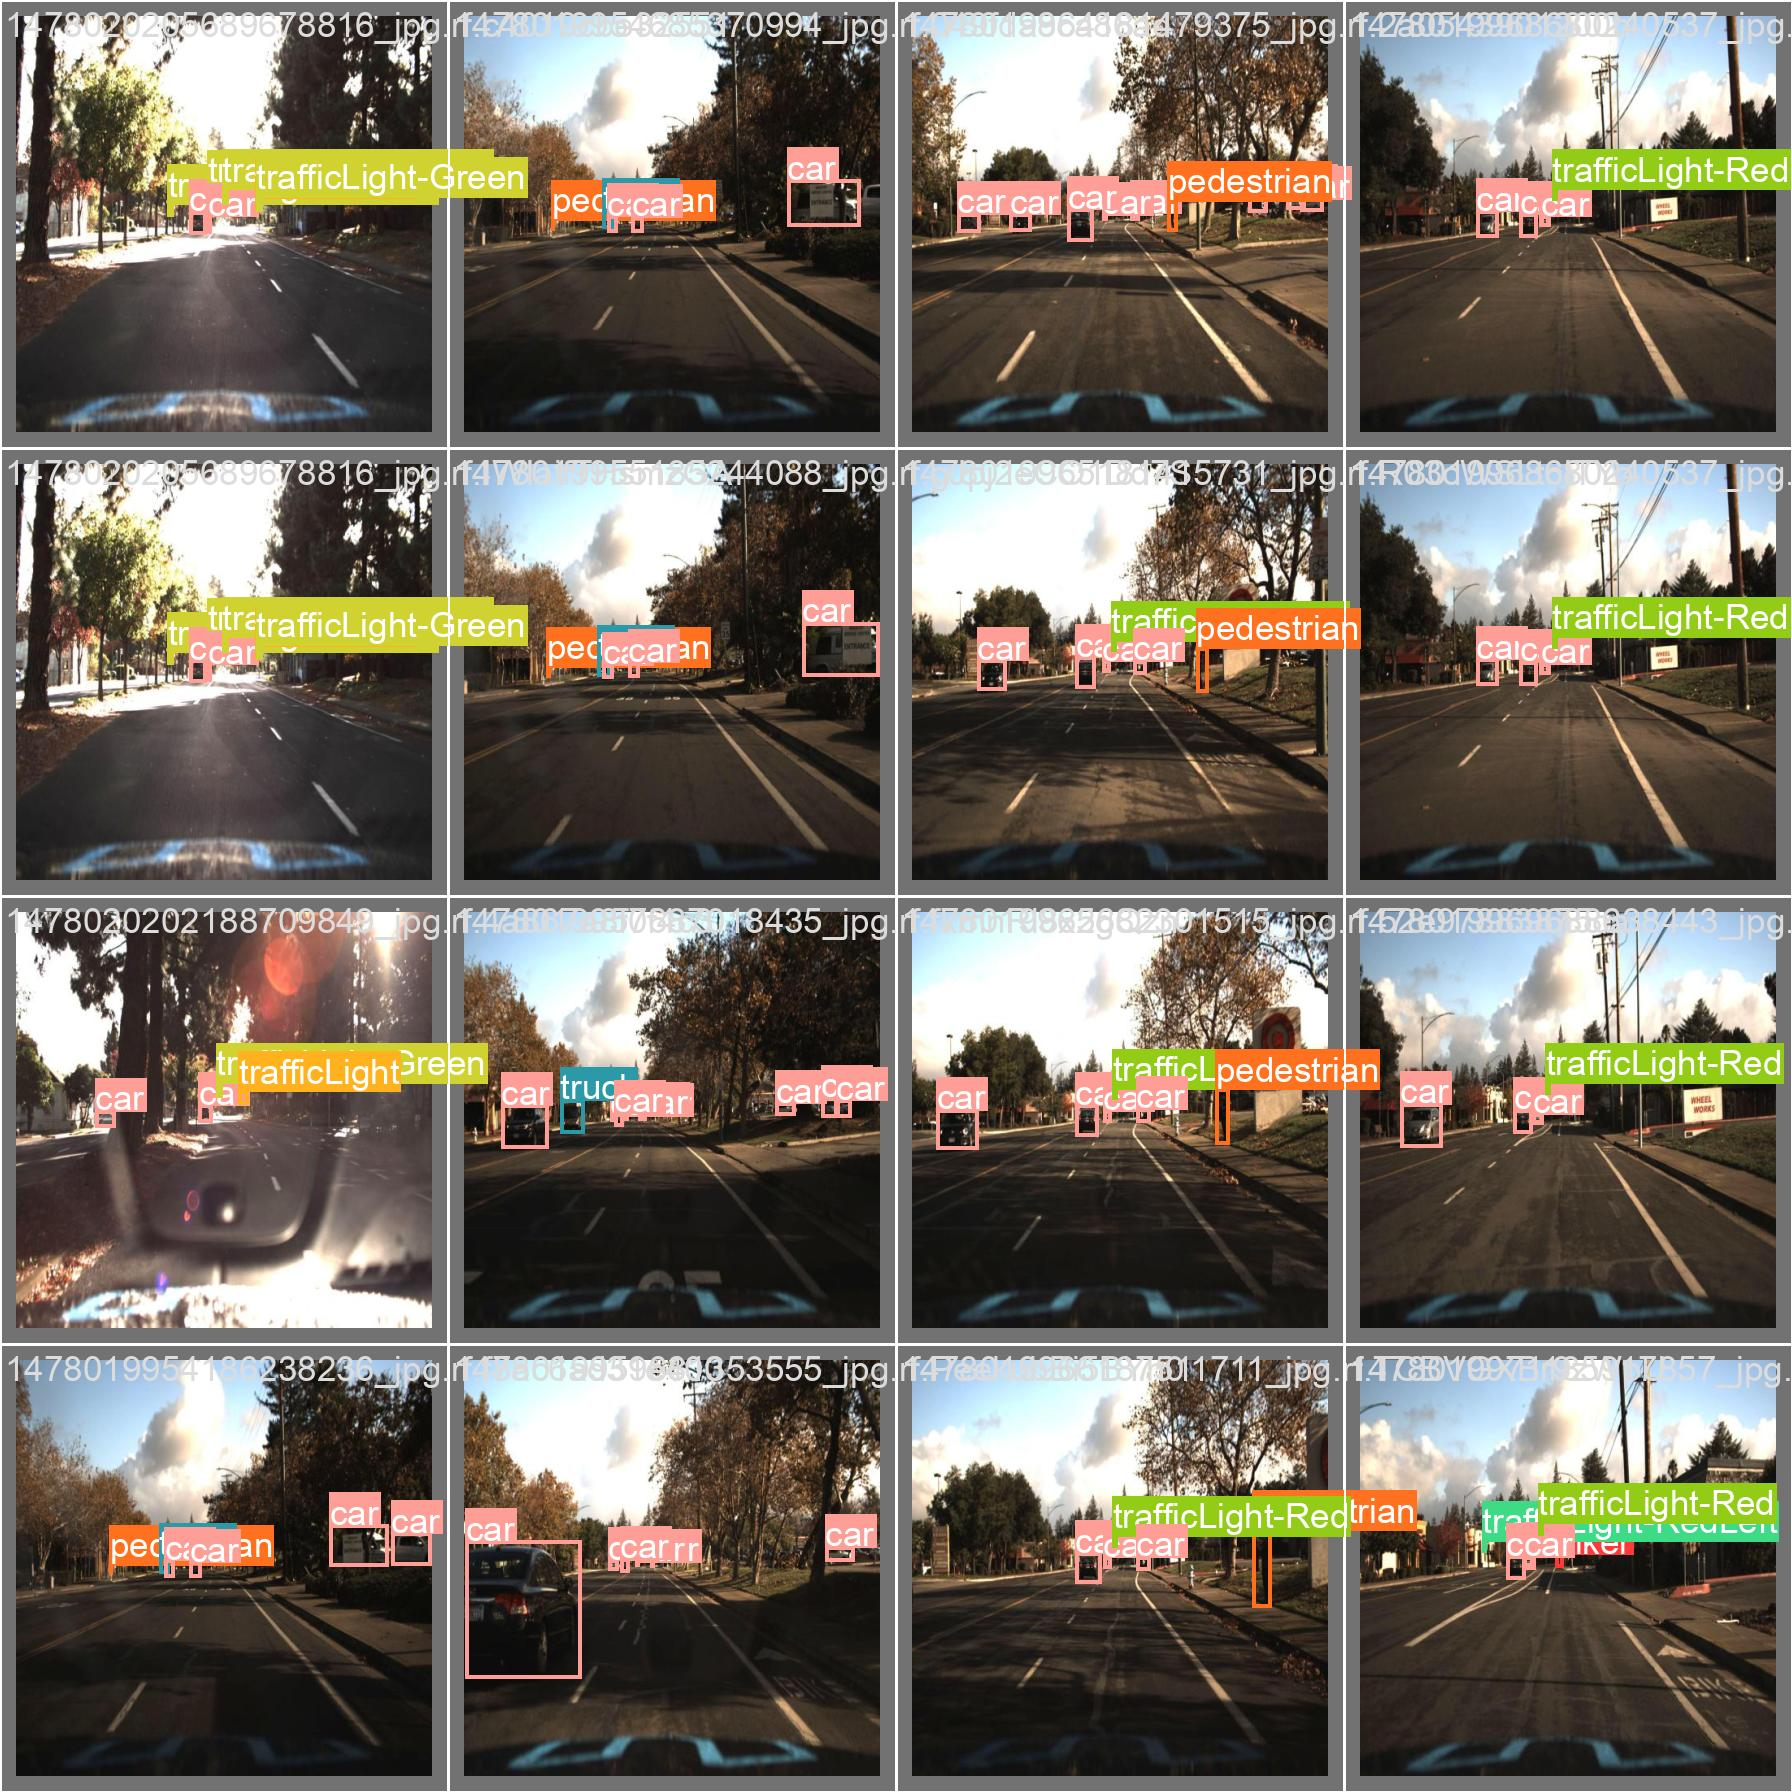

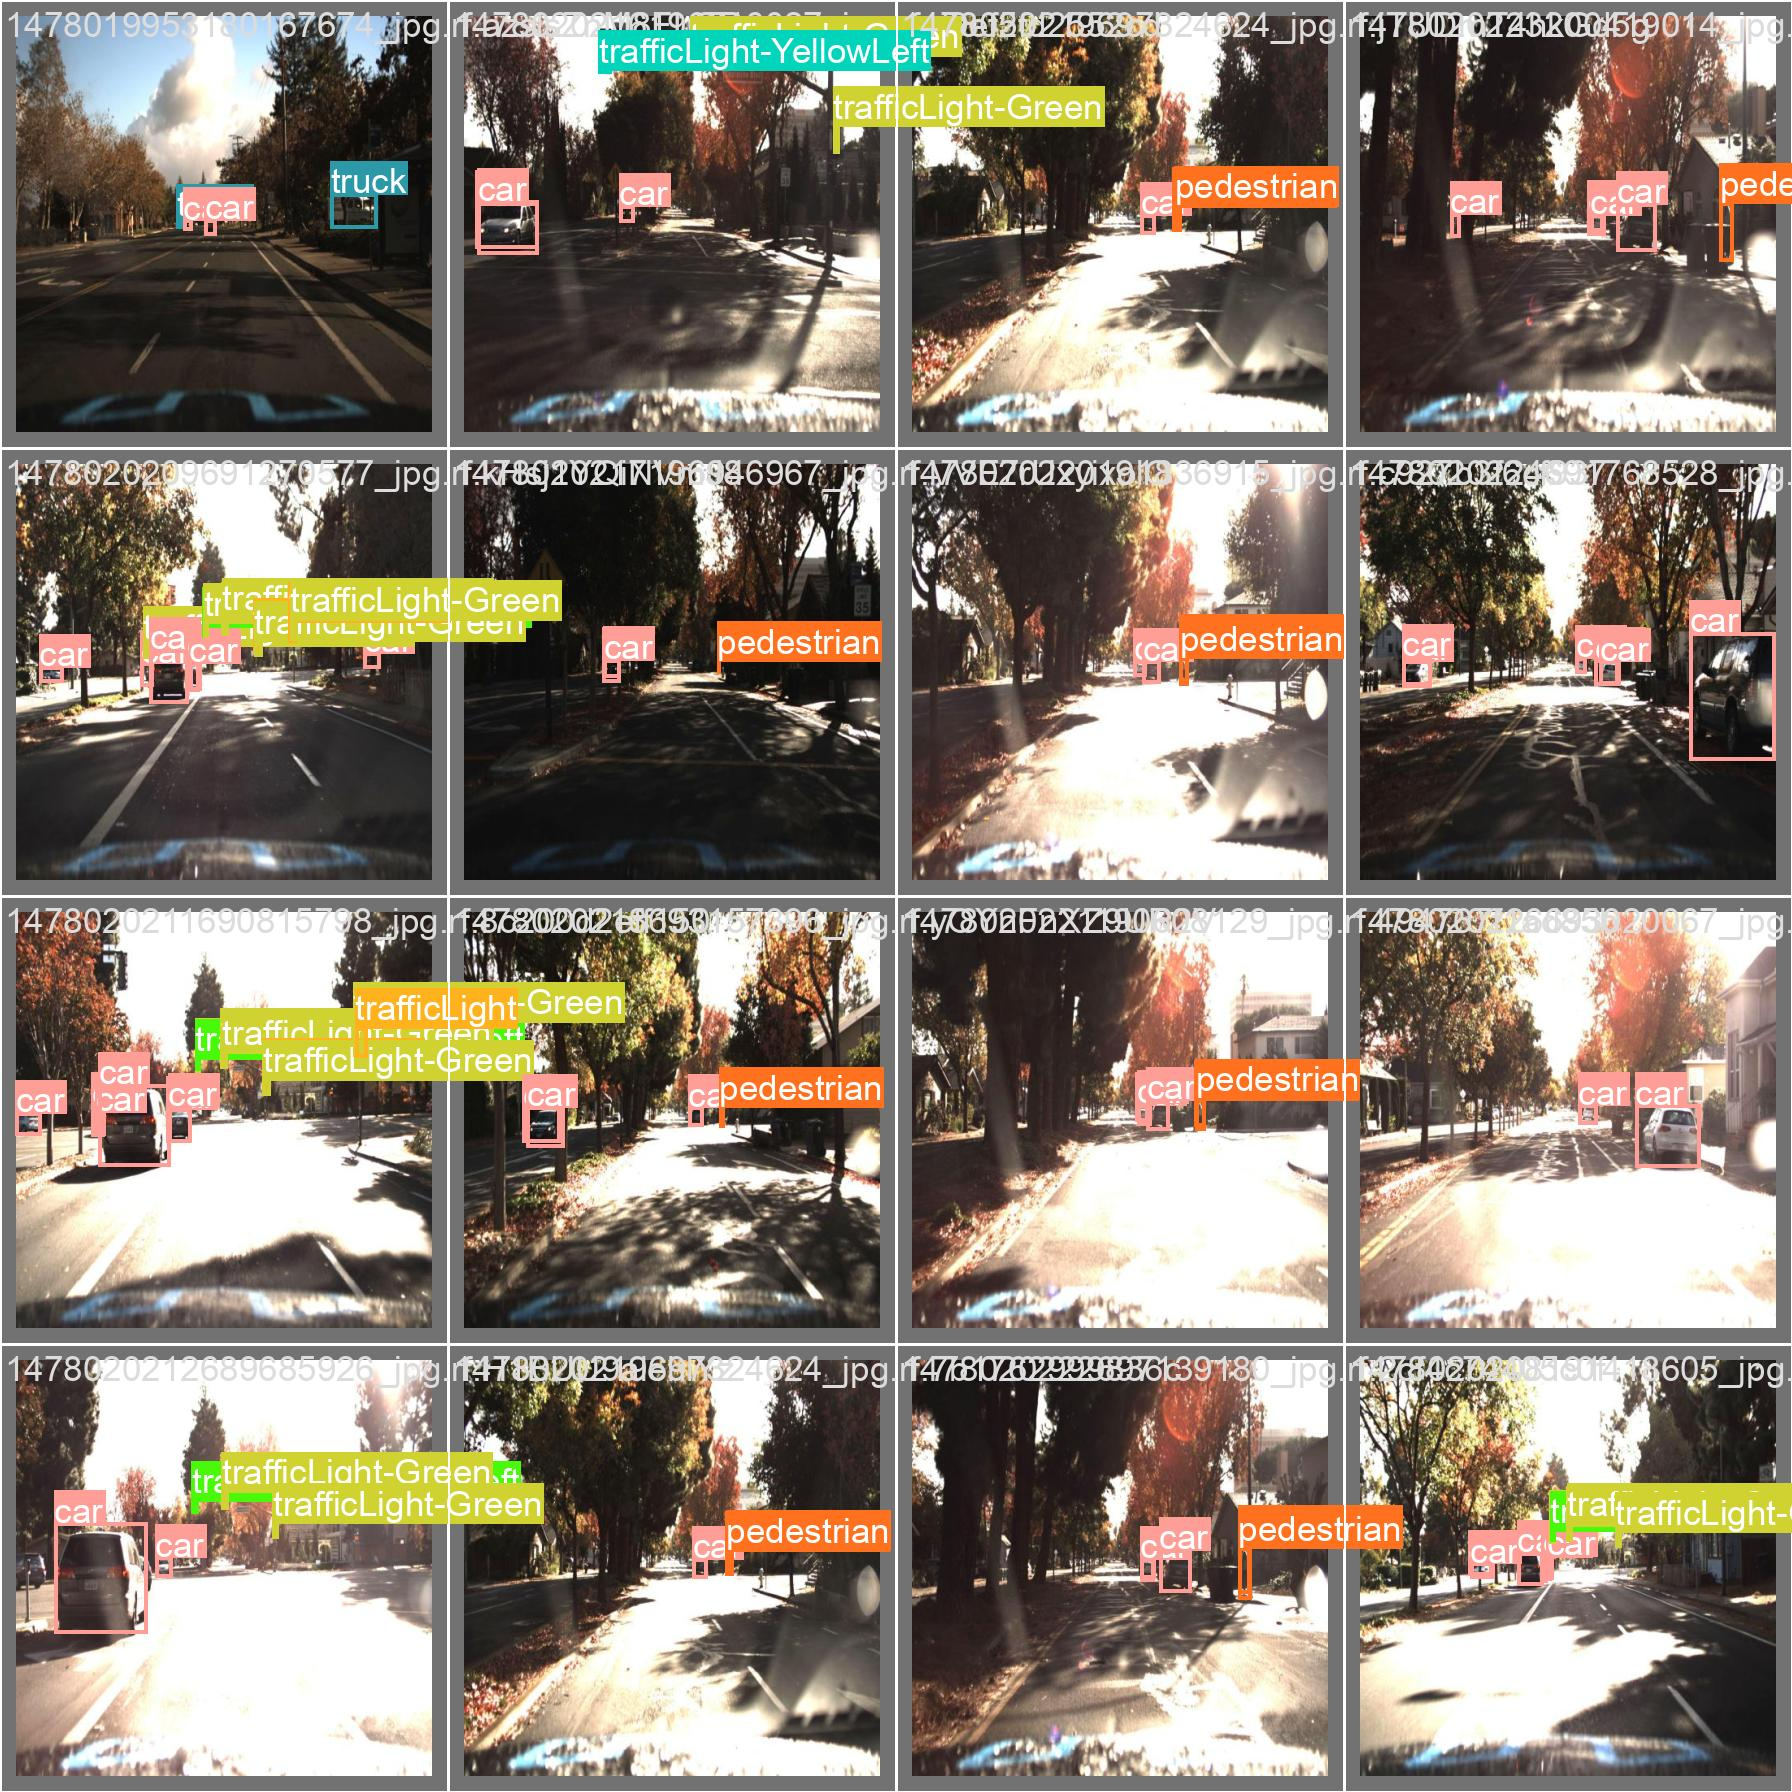

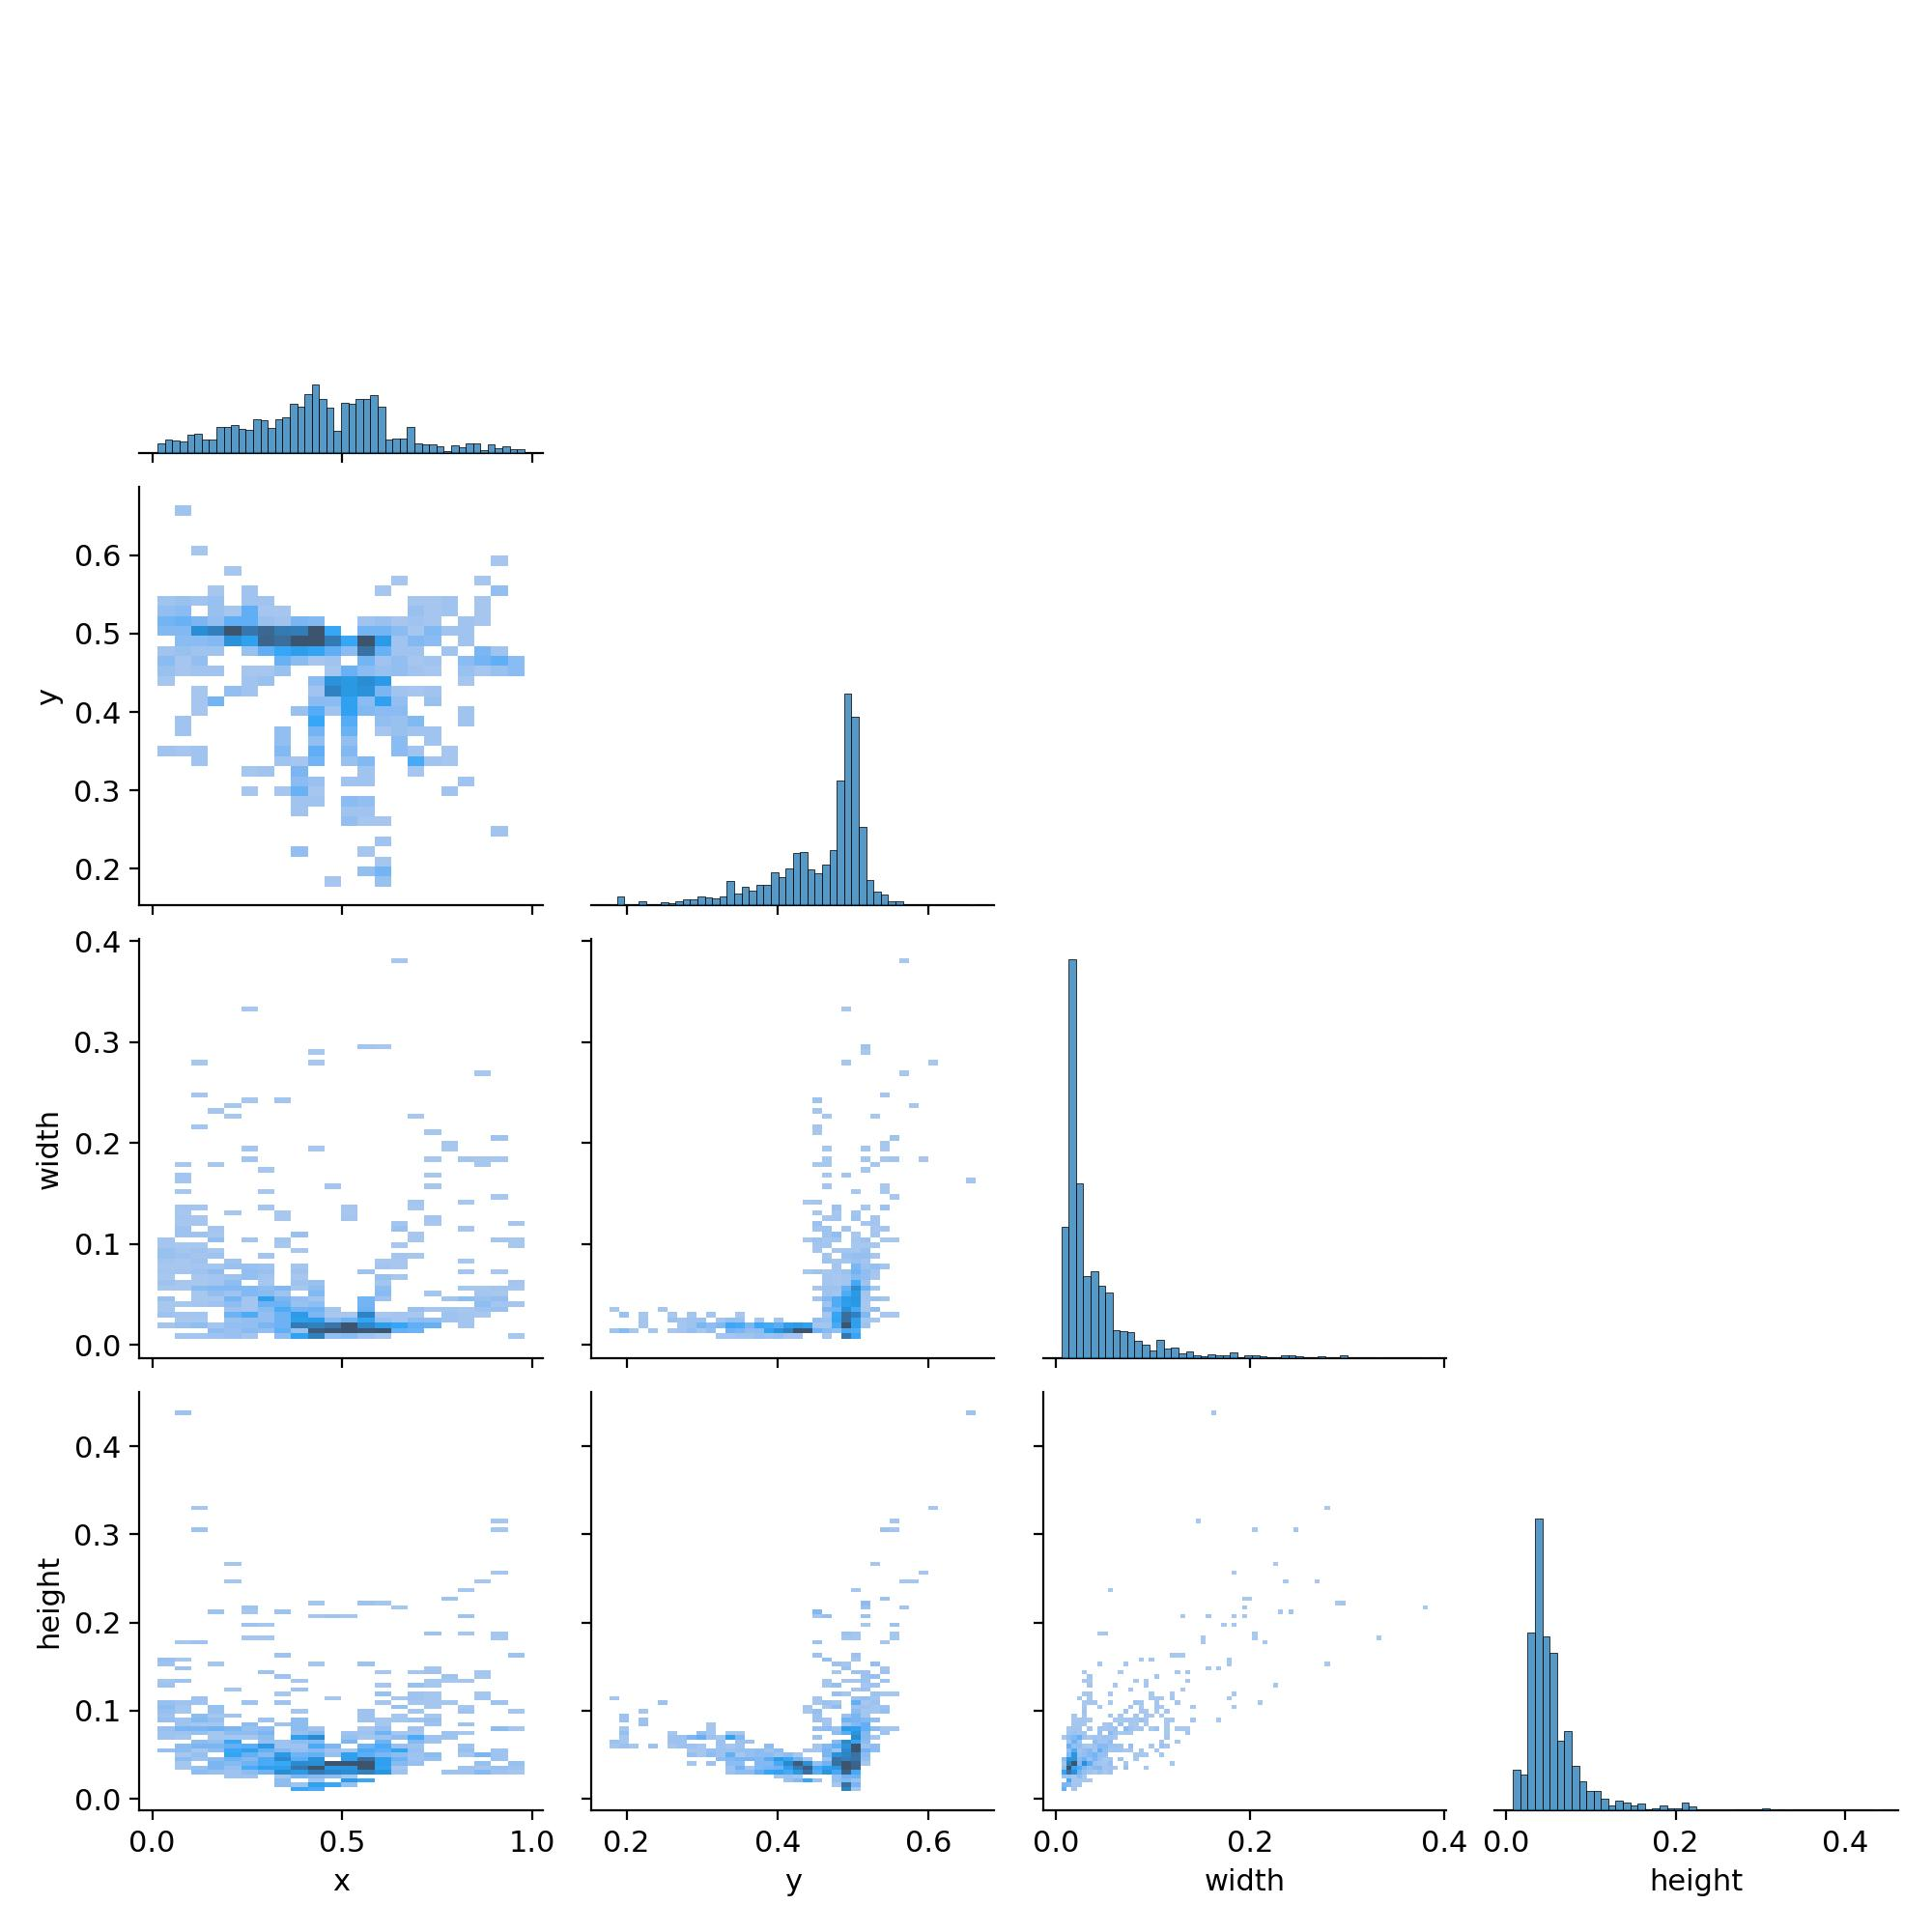

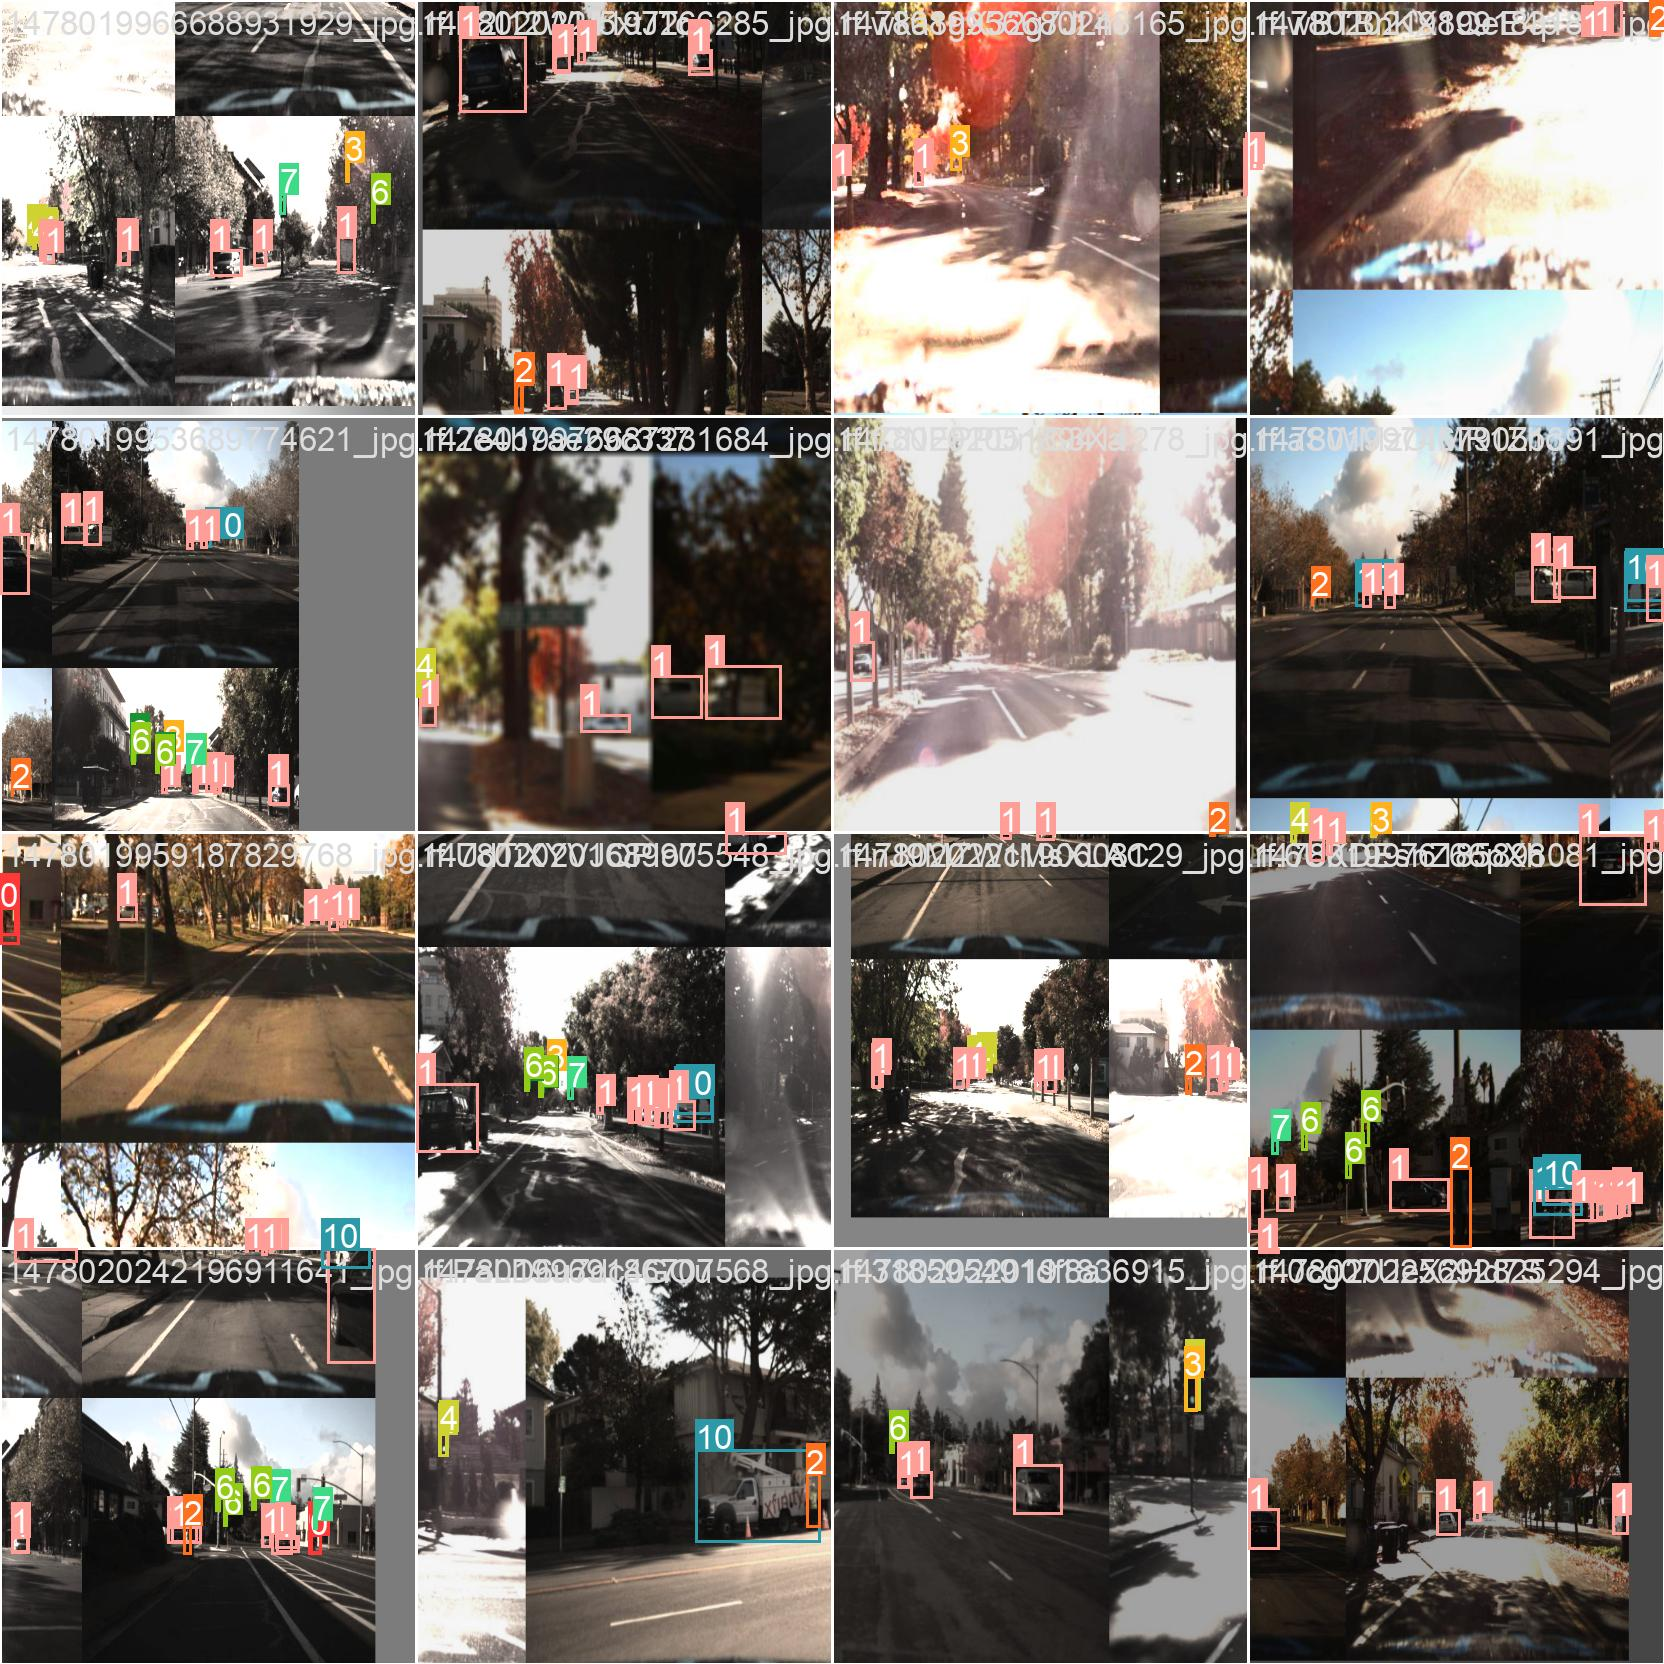

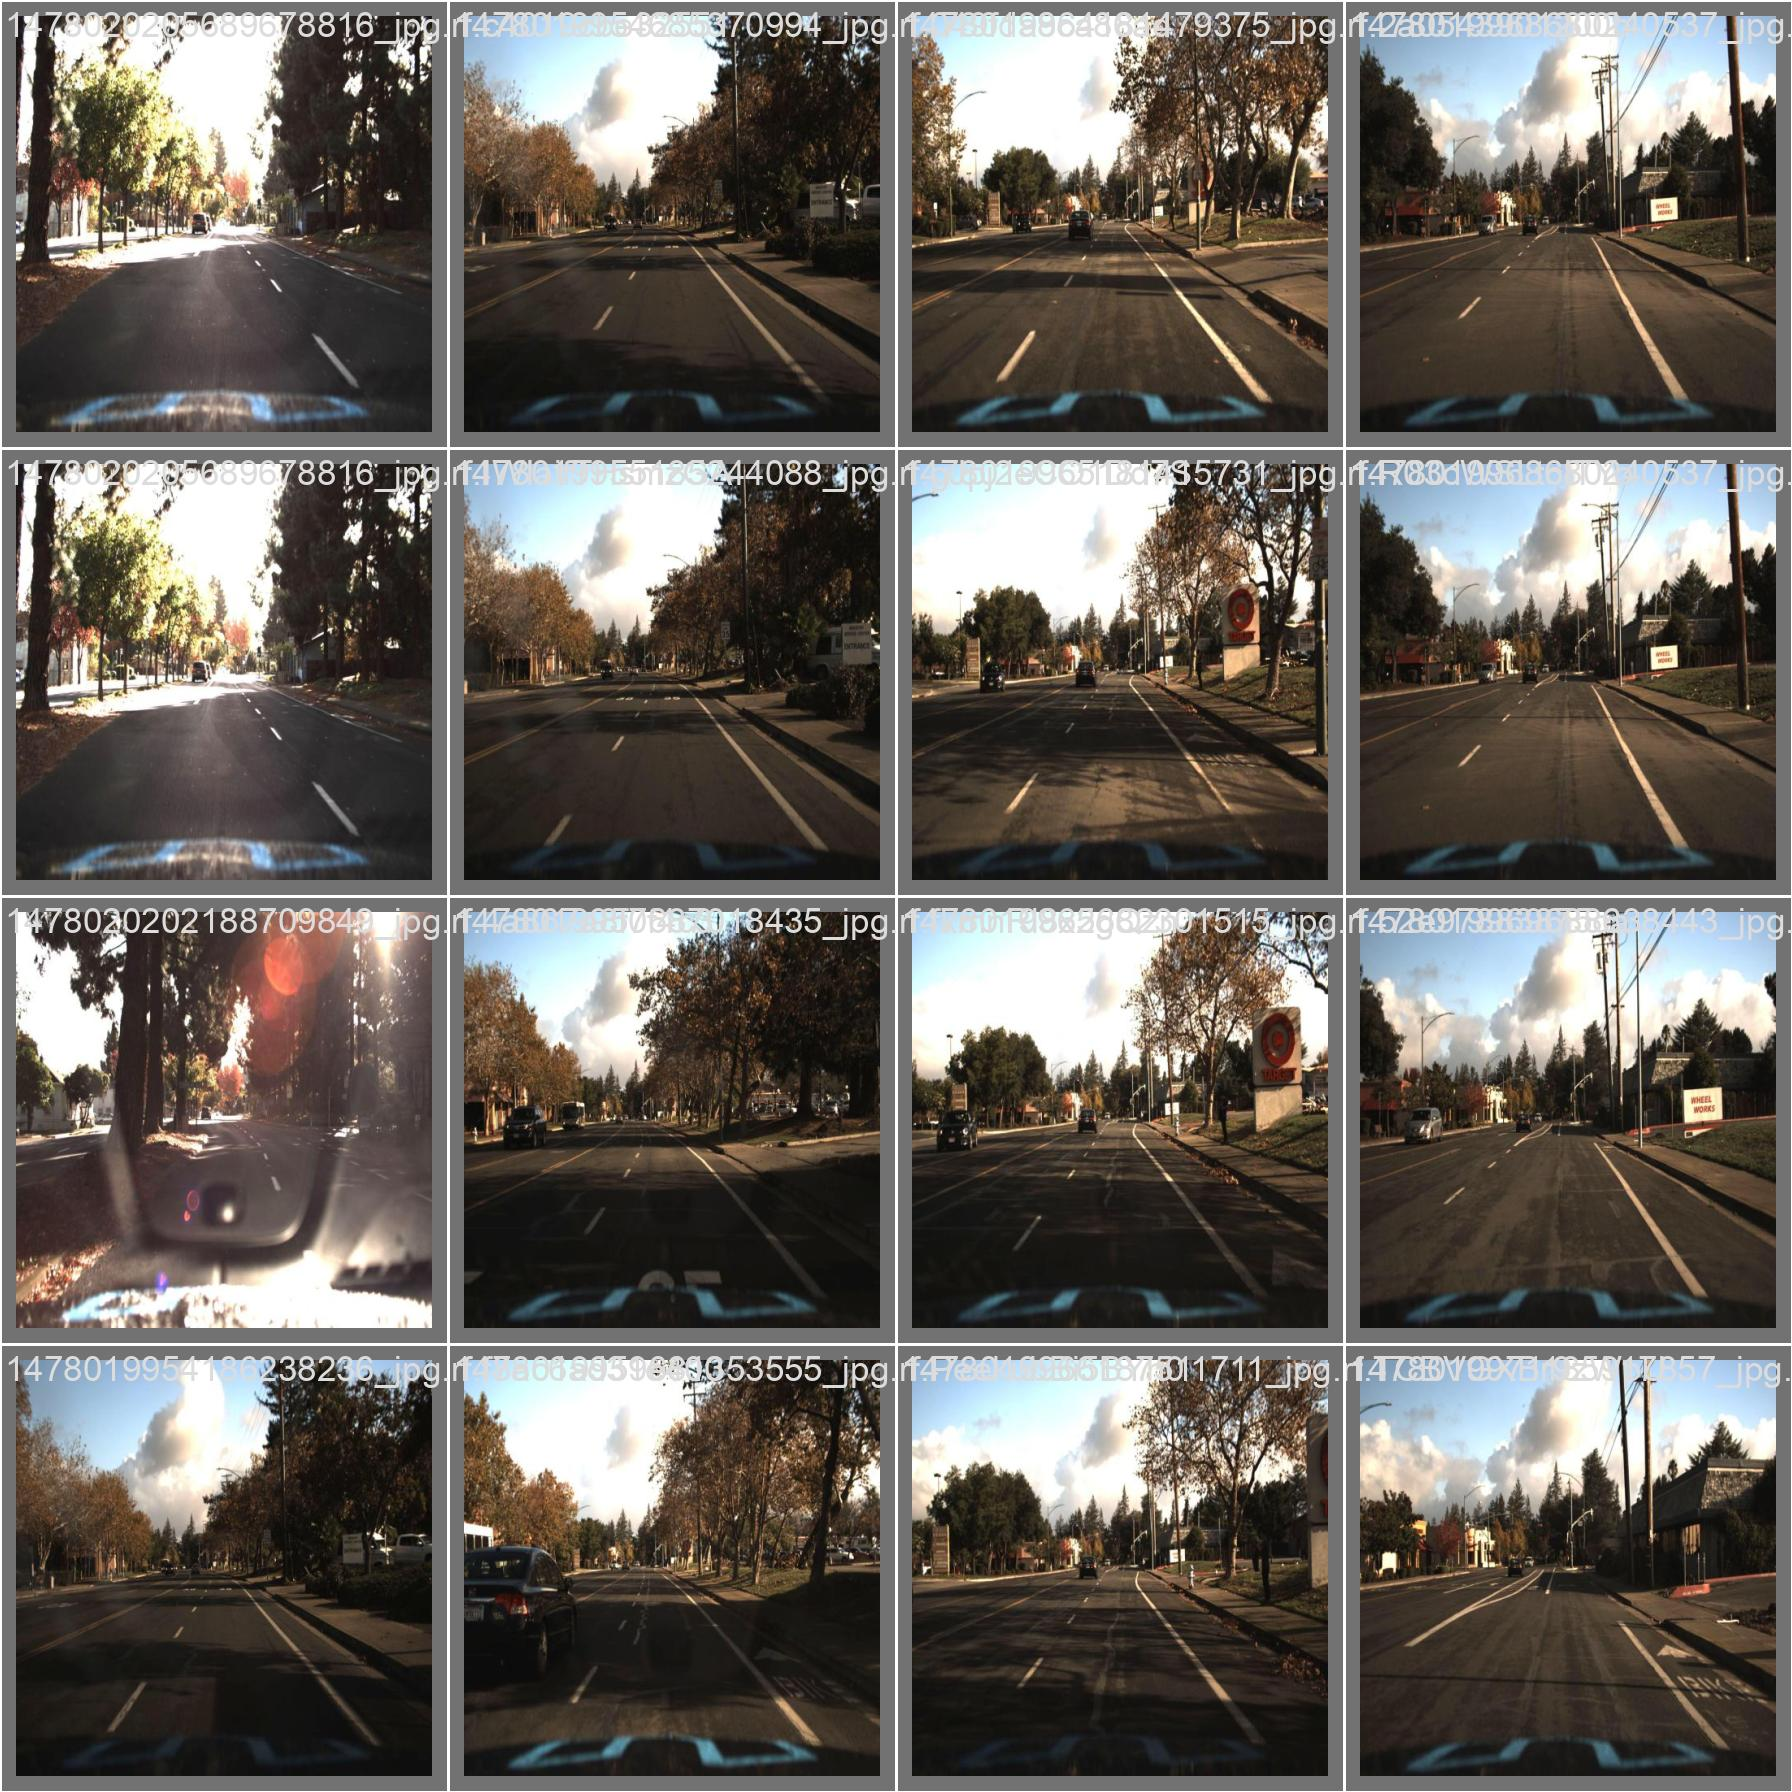

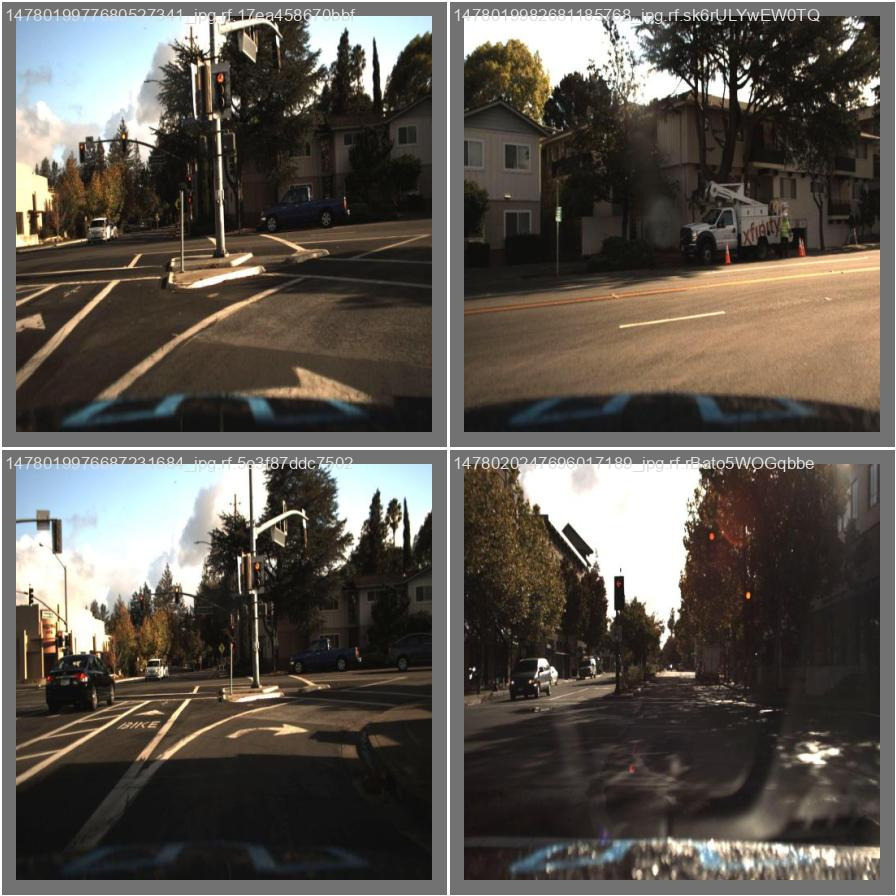

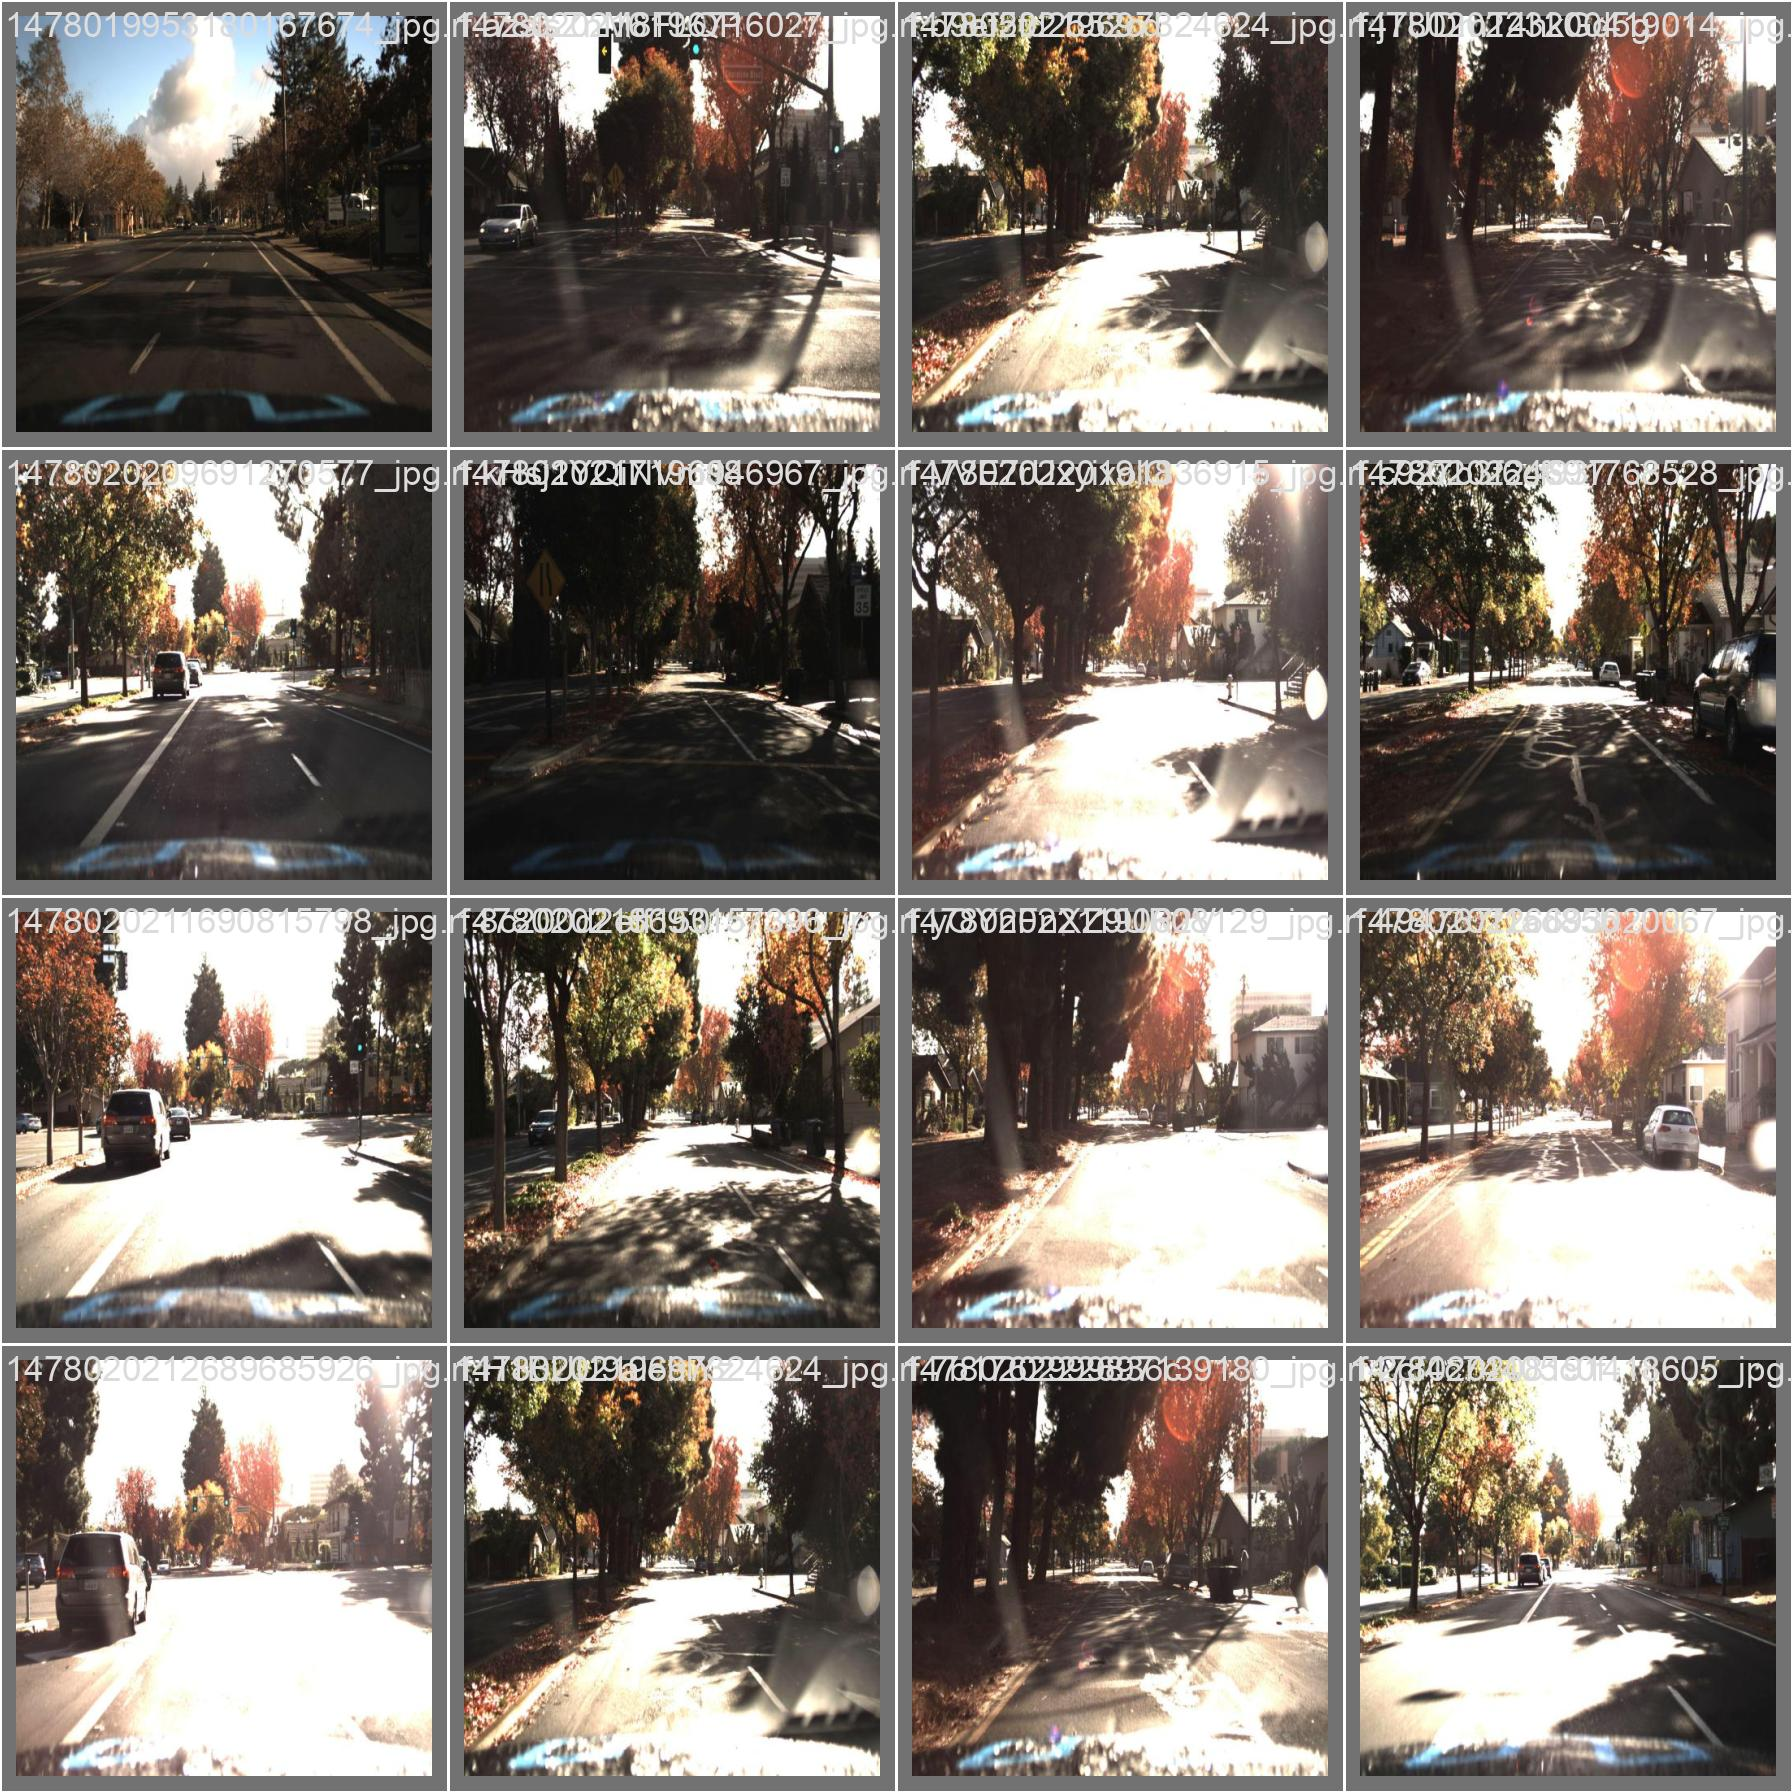

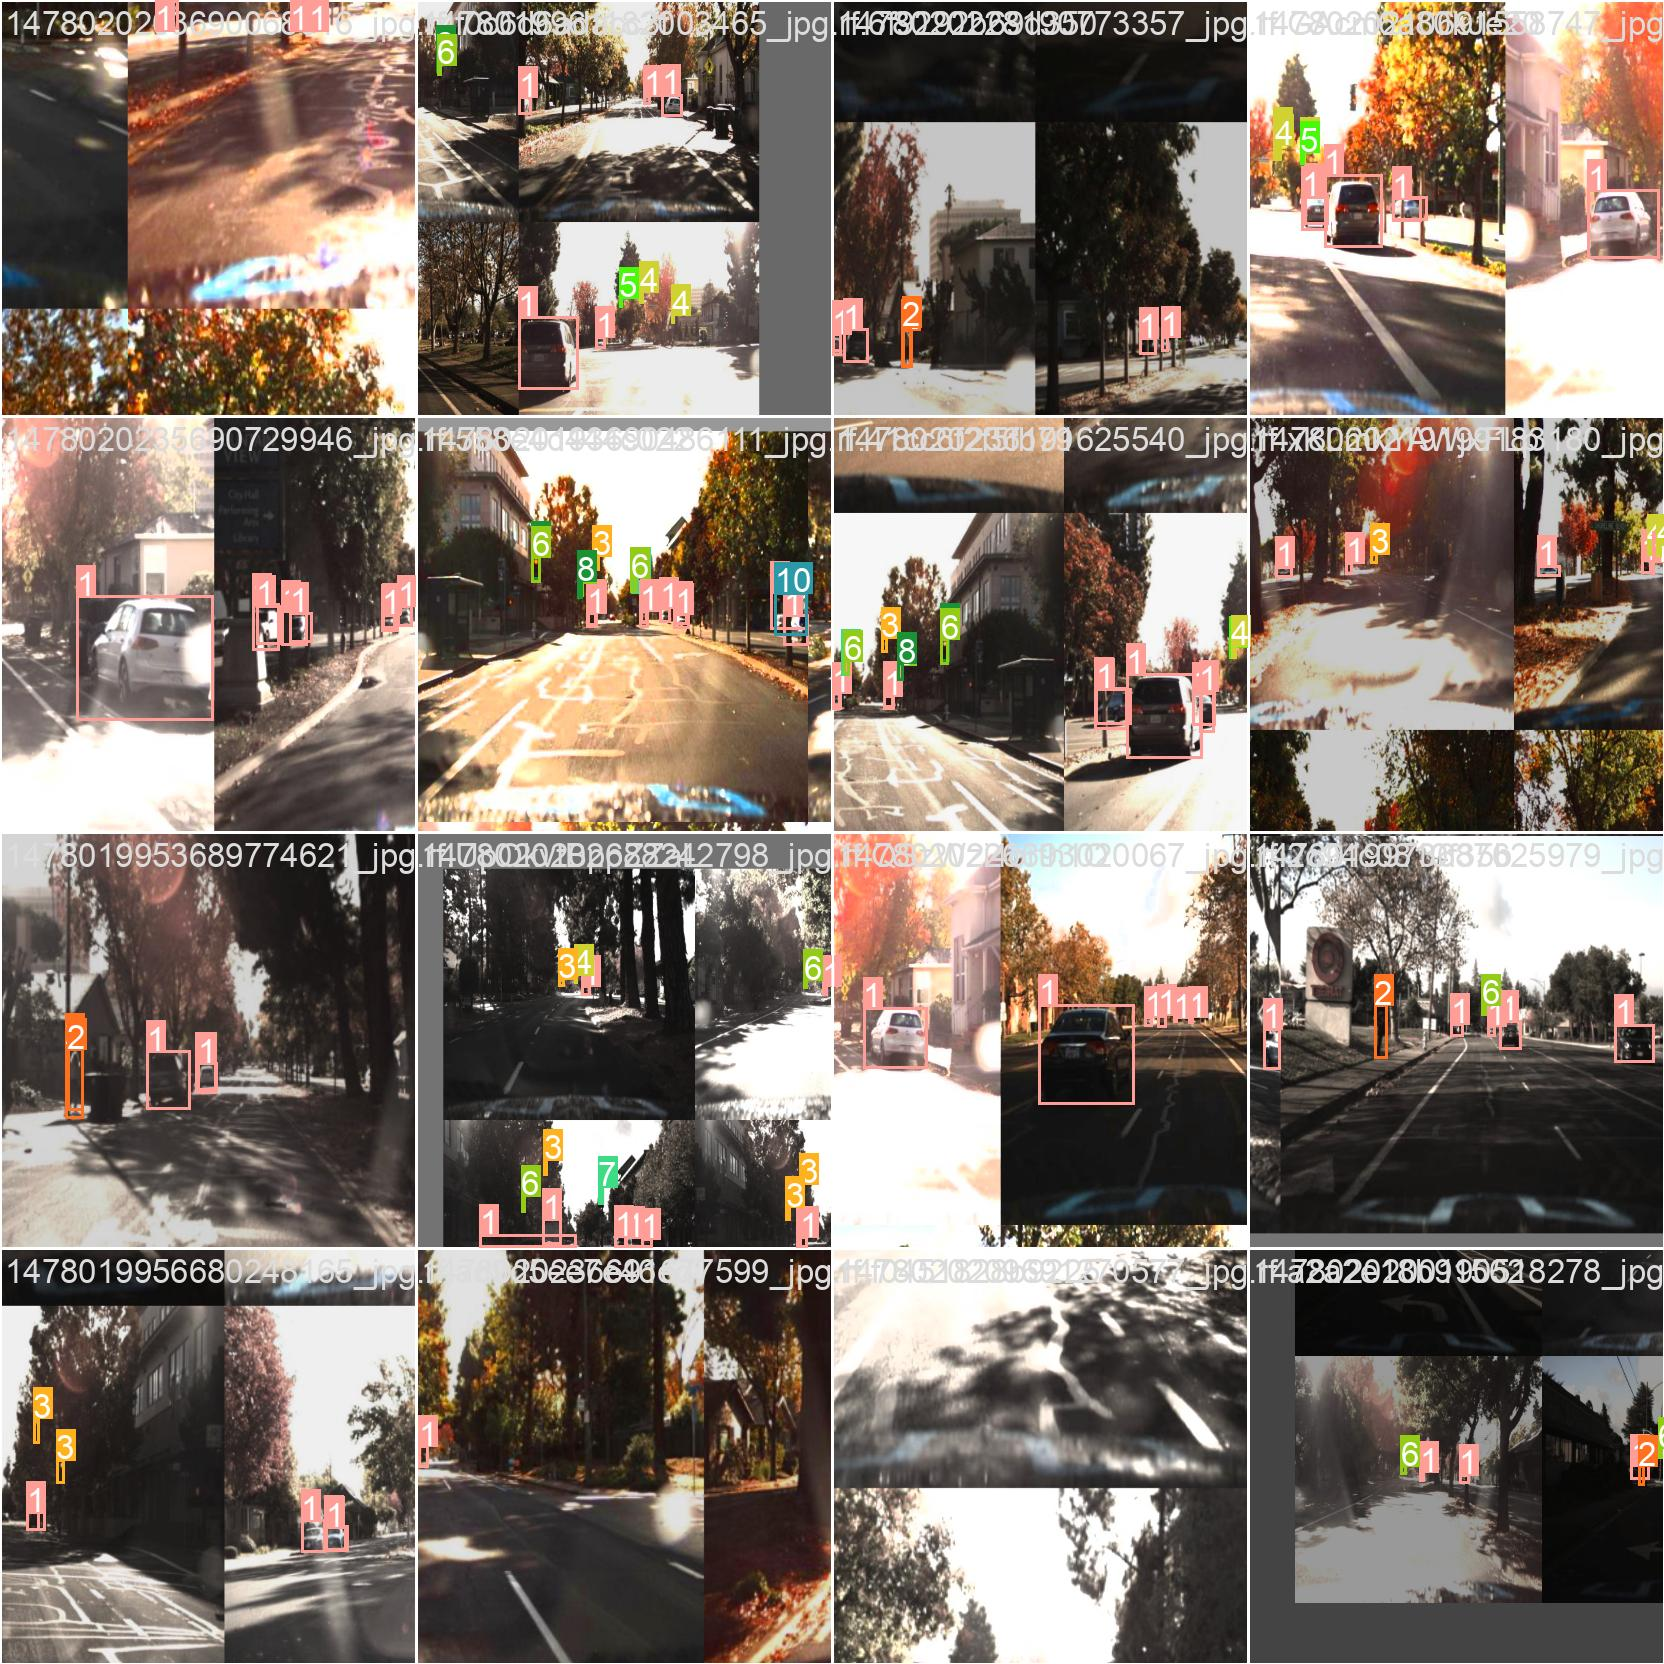

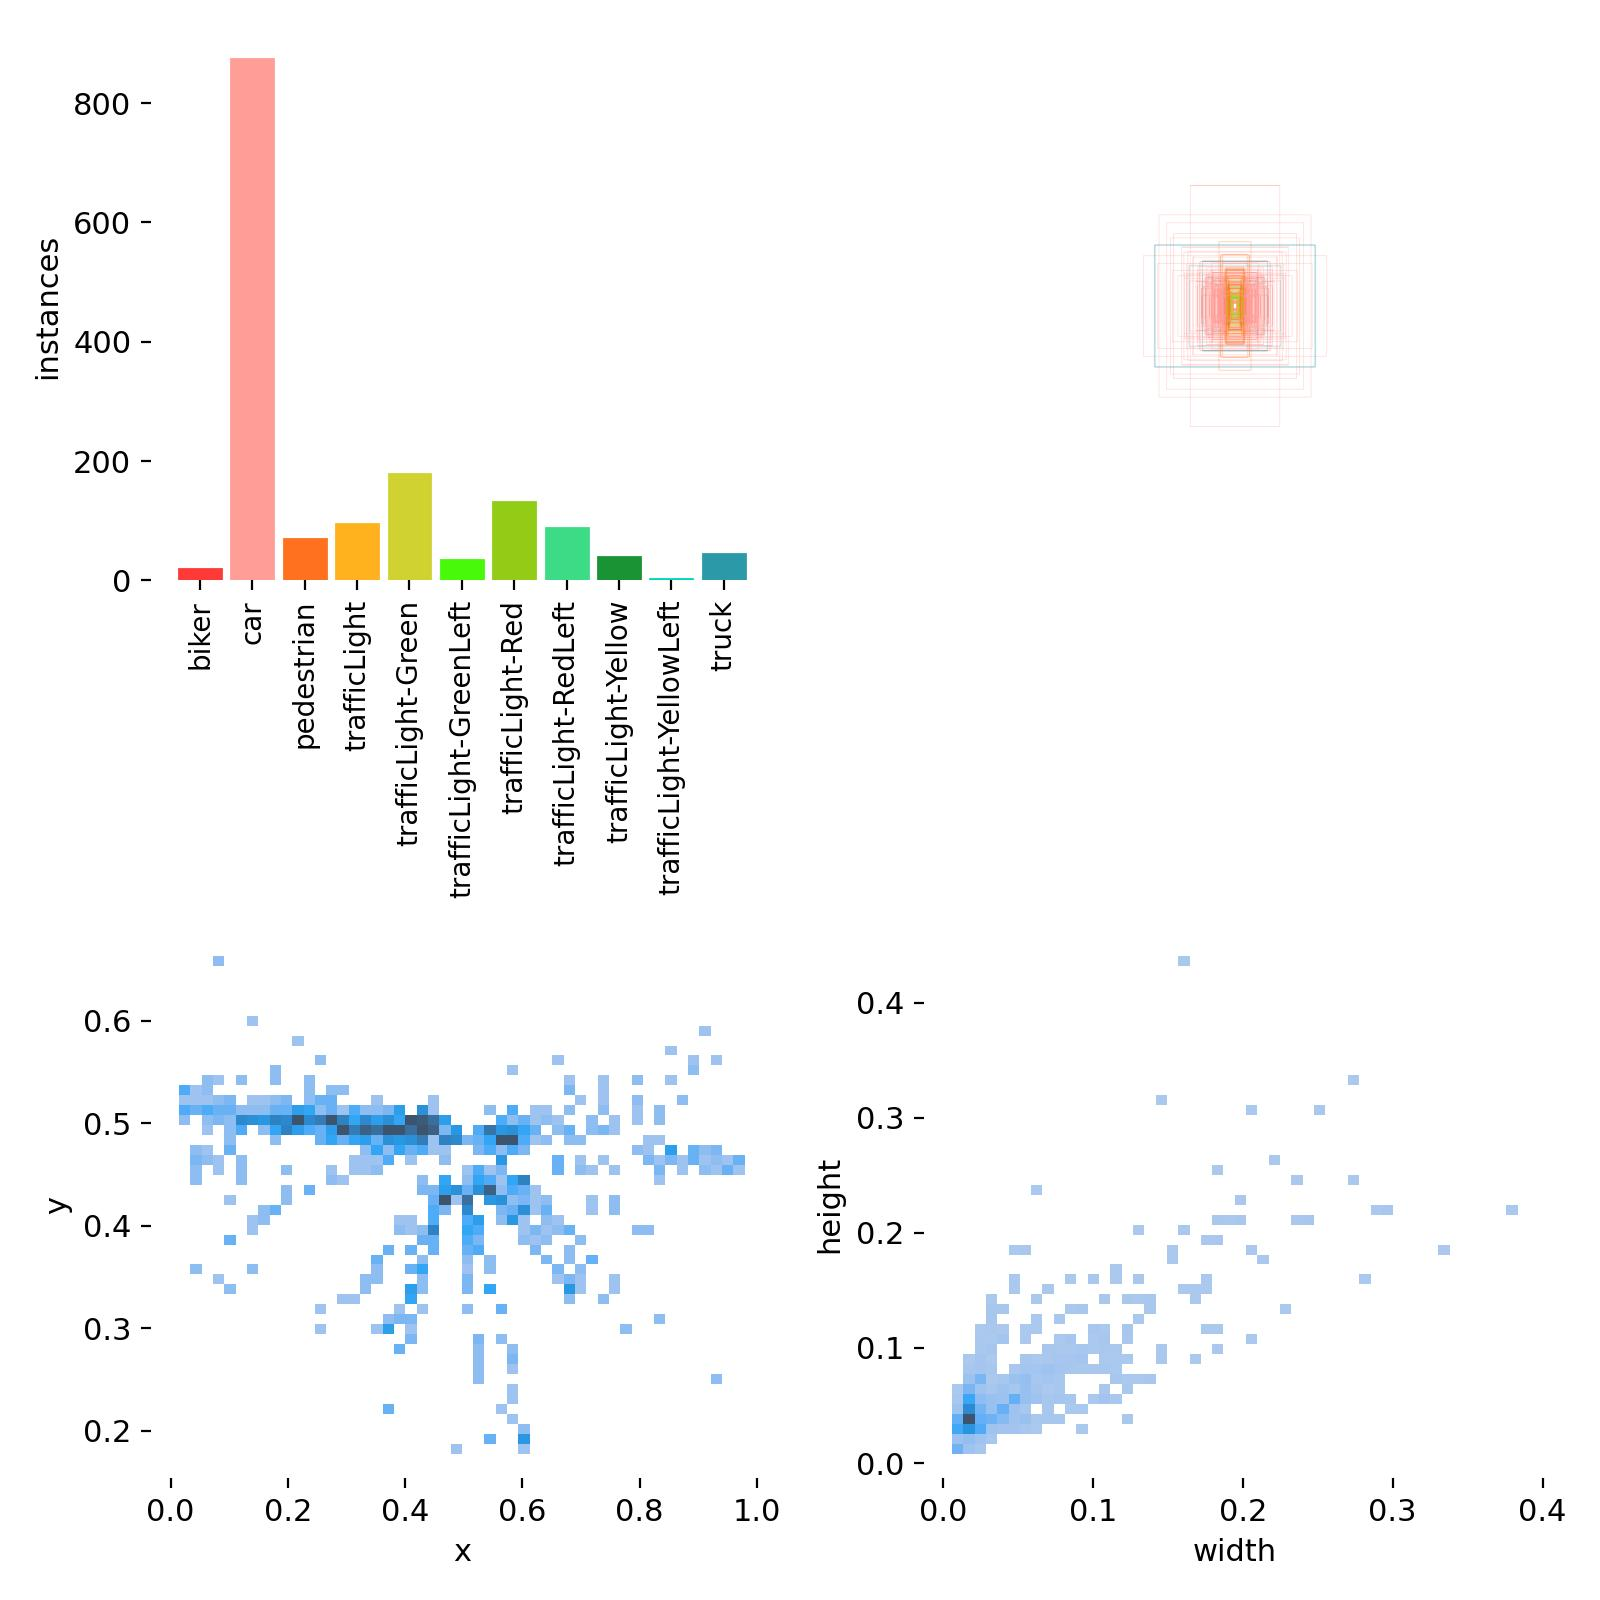

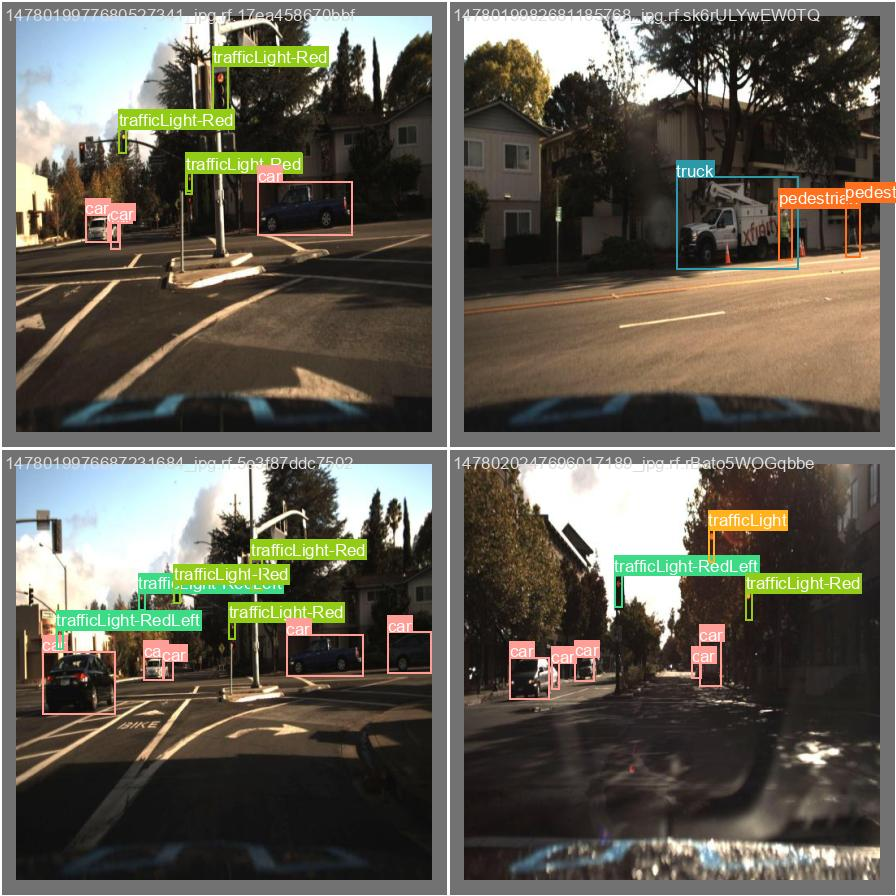

In [15]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/train/yolov5s_results/*.jpg'):
    display(Image(filename=imageName))
    print("\n")
